## EDA para el dataset wine

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

En esta práctica vamos a trabajar con el dataset wine (wine.data). Lo primero que debes haces es leer los datos en un dataframe. A partir de él puedes comenzar a analizar cómo es el dataset y qué tipo de datos contiene:
* ¿Cuántos datos hay?
* ¿Cuántas características?
* ¿En qué columna está la clase a la que pertenece cada dato?
* ¿Hay valores nulos?

In [2]:
wine=pd.read_csv('wine.data')
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Puedes comenzar ya a realizar un análisis exploratorio un poco más profundo. En primer lugar de forma numérica:
* ¿Cómo se distribuyen los datos en cada característica? ¿Cuánto es la media? ¿Y la desviación?
* ¿Cuántas clases diferentes hay?
* ¿Cuántos ejemplos hay de cada clase?

In [3]:
wine.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


A continuación comenzamos con el análisis exploratorio de datos visual. En este problema tenemos bastantes características para cada uno de los datos. Analiza cada una de ellas de tal forma que puedas intuir si, según esa característica, las clases son fácilmente linealmente separables o no

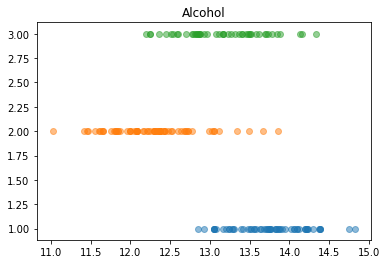

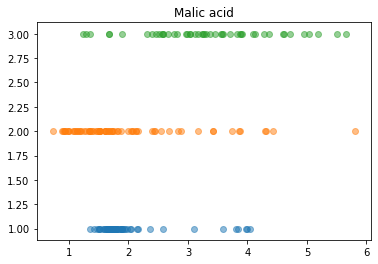

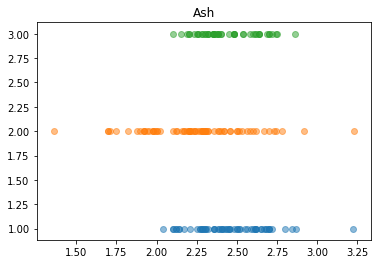

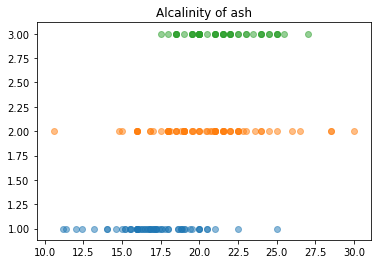

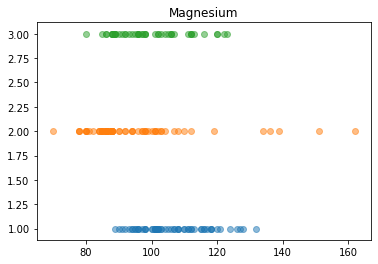

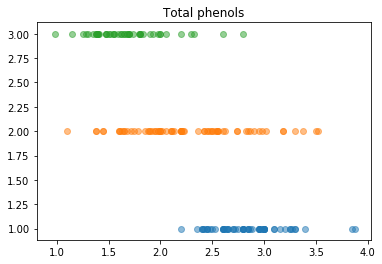

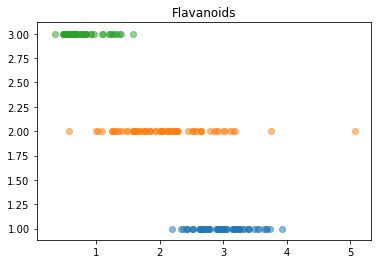

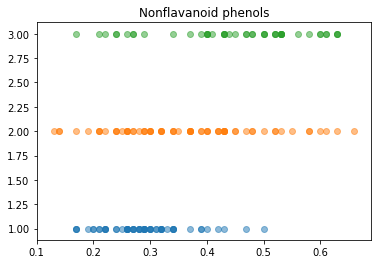

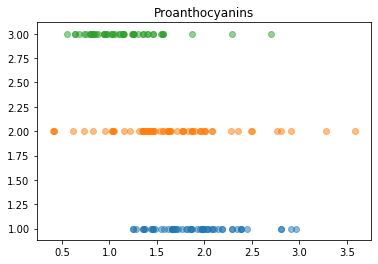

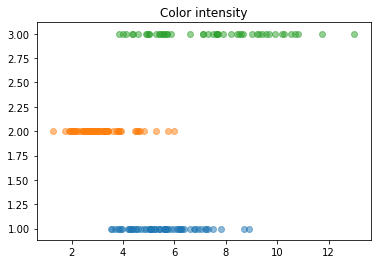

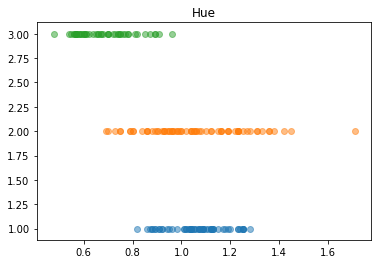

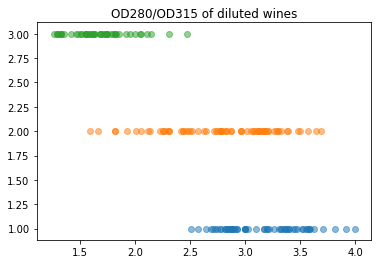

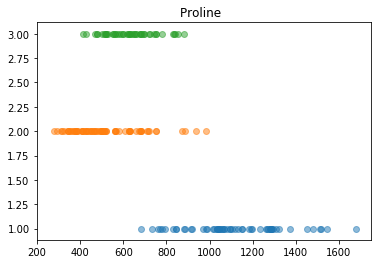

In [4]:
agrupado=wine.groupby('Class')
for i in wine.keys()[1:]:
    plt.figure()
    plt.title(i)
    aux=1
    for name,group in agrupado:
        plt.scatter(group[i],np.ones_like(group[i])*aux,alpha=0.5)
        aux=aux+1

Según el análisis anterior selecciona aquellas características que te parezcan mejores (no más de 4 o 5). Para estas, realiza un análisis visual por parejas (carac1 - carac2, carac1 - carac 3 ...)

<Figure size 432x288 with 0 Axes>

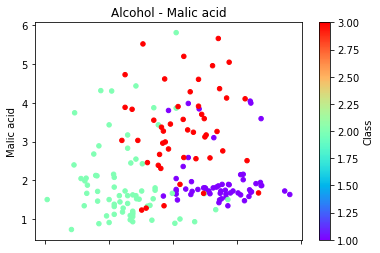

<Figure size 432x288 with 0 Axes>

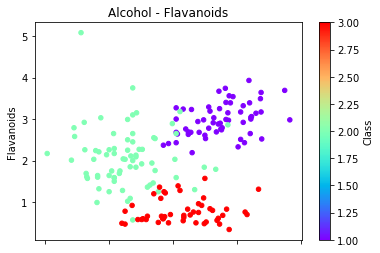

<Figure size 432x288 with 0 Axes>

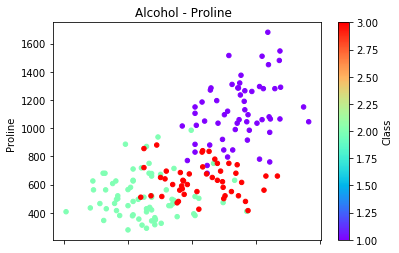

<Figure size 432x288 with 0 Axes>

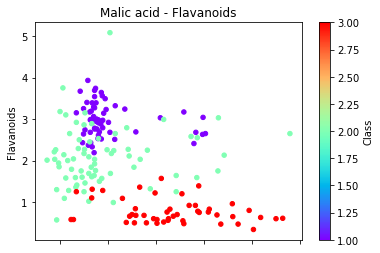

<Figure size 432x288 with 0 Axes>

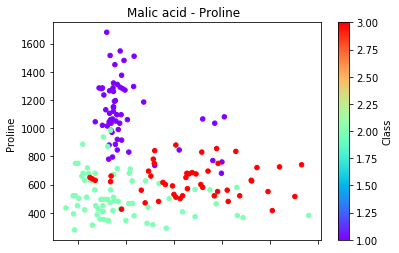

<Figure size 432x288 with 0 Axes>

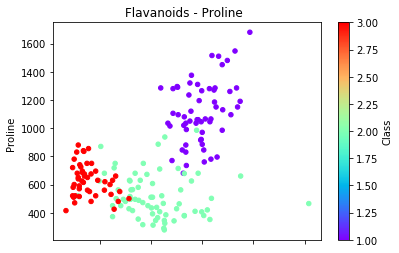

In [5]:
elegidas=wine.keys()[[1,2,7,13]]
for i in np.arange(4):
    for j in np.arange(i+1,4):
        plt.figure();
        wine.plot.scatter(x=elegidas[i],y=elegidas[j],c=wine.keys()[0],cmap='rainbow');
        plt.title(elegidas[i]+' - '+elegidas[j]);

Una vez realizado este análisis vamos a probar cómo clasifican la selección de características que hemos hecho. Para ello comienza dividiendo el dataset en dos conjuntos: conjunto de entrenamiento (128 datos) y conjunto de test (50 datos)

Recuerda que si los datos originales están ordenados por clase, es necesario aleatorizarlos antes de hacer la partición

In [6]:
np.random.seed(150)
aleat=np.random.permutation(np.arange(178))
train=wine.iloc[aleat[0:128]]
test=wine.iloc[aleat[128:]]

Comienza con una clasificación basada sólo en dos características. Para ello elige las dos características del apartado anterior que te ha pareciso que separan los datos más fácilmente.

Clasifica cada uno de los datos de test en base a los datos de entrenamiento. Para ello utiliza el método del vecino más cercano, es decir, asignarle la clase del dato de entrenamiento que sea más similar al dato a clasificar.

Para medir cómo de buena es la clasificación puedes contar el porcentaje de aciertos (número de ejemplos bien clasificados entre el número total de ejemplos de test)

In [11]:
aciertos=0
for i in np.arange(50):
    dTest=test.iloc[i,[1,7]]
    clase=test.iloc[i,0]
    distancias=np.zeros((128,1))
    for j in np.arange(128):
        dtrain=train.iloc[j,[1,7]]
        distancias[j]=((dtrain-dTest)**2).sum()
    posi=distancias.argmin()
    if clase==train.iloc[posi,0]:
        aciertos+=1
print(float(aciertos)/50*100)

70.0


¿Has obtenido un buen resultado? Si no lo has hecho, puede que no hayas tenido en cuenta la escala de cada uno de los datos. Si los valores de la primera característica varían entre 0 y 1, y los valores de la segunda característica varían entre 0 y 100, la distancia de dos datos se va a ver afectada prácticamente solo por la segunda característica.

Para evitar este problema normaliza los datos. En cada característica, el nuevo valor debe ser el valor original menos la media de esa característica, entre la desviación de dicha característica.

Para el conjunto de entrenamiento debes calcular sus medias y desviaciones por atributo y normalizar. Para el conjunto de test, debes utilizar la media y desviación del conjunto de entrenamiento.

Repite el proceso de clasificación anterior y comprueba que la clasificación mejora notablemente.

In [12]:
medias=train.mean()
desviaciones=train.std()
trainNorm=(train-medias)/desviaciones
testNorm=(test-medias)/desviaciones

aciertos=0
for i in np.arange(50):
    dTest=testNorm.iloc[i,[1,7]] #con estos atributos no mejora porque están es escalas parecidas. Probar por ejemplo la 7 y la 13 para ver la diferencia
    clase=test.iloc[i,0]
    distancias=np.zeros((128,1))
    for j in np.arange(128):
        dtrain=trainNorm.iloc[j,[1,7]]
        distancias[j]=((dtrain-dTest)**2).sum()
    posi=distancias.argmin()
    if clase==train.iloc[posi,0]:
        aciertos+=1
print(float(aciertos)/50*100)

88.0


¿Qué hubiese pasado si no seleccionamos características? Prueba a realizar la clasificación con las 13 características que comprende el dataset.
* ¿Es el resultado mejor, pero o igual?
* ¿Eso significa que siempre hay que hacer selección de características? ¿O nunca?

In [15]:
aciertos=0
for i in np.arange(50):
    dTest=test.iloc[i,1:]
    clase=test.iloc[i,0]
    distancias=np.zeros((128,1))
    for j in np.arange(128):
        dtrain=train.iloc[j,1:]
        distancias[j]=((dtrain-dTest)**2).sum()
    posi=distancias.argmin()
    if clase==train.iloc[posi,0]:
        aciertos+=1
print(float(aciertos)/50*100)

aciertos=0
for i in np.arange(50):
    dTest=testNorm.iloc[i,1:]
    clase=test.iloc[i,0]
    distancias=np.zeros((128,1))
    for j in np.arange(128):
        dtrain=trainNorm.iloc[j,1:]
        distancias[j]=((dtrain-dTest)**2).sum()
    posi=distancias.argmin()
    if clase==train.iloc[posi,0]:
        aciertos+=1
print(float(aciertos)/50*100)

76.0
96.0


Por último, vamos a estudiar qué ocurre si en lugar de trabajar sobre este dataset tal cual lo obtenemos, decidimos transformarlo a un nuevo espacio. Para ello utiliza la transformación PCA (Análisis de Componentes Principales) que ya hemos visto en este título propio.

Una vez pasado al nuevo espacio, clasifica con las dos primeras características. Haz otra clasificación utilizando todas las características. ¿Son los resultados mejores, peores o iguales que con los datos sin transformar?